In [1]:
# Load csv file.
import csv
plateReaderFilePath = '/home/jiongyi/Documents/dna_damage/pyrene_assays/2018_12_13_300_nM_gst_wasp_wca_50_nM_arp23_1500_nM_5pct_pyrene_actin_pm_5_uM_60bp_dna.csv'
with open(plateReaderFilePath, 'r') as csvFile:
    reader = csv.DictReader(csvFile)
    importDict = {}
    for name in reader.fieldnames:
        importDict.update({name: []})
    for row in reader:
        for key in importDict.keys():
            try:
                importDict[key].append(float(row[key]))
            except:
                importDict[key].append(row[key])

In [79]:
from numpy import zeros
from matplotlib.pyplot import subplots
rfuMat = zeros((len(timeArr), len(fieldNamesList) - 1))
for i in range(1, len(fieldNamesList)):
    rfuArr = array(importDict[fieldNamesList[i]])
    rfuArr -= min(rfuArr)
    rfuMat[:, i - 1] = rfuArr

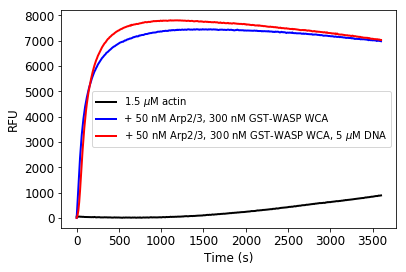

In [80]:
# Plot averages.
from numpy import mean, std
figObj, axObj = subplots()
axObj.plot(timeArr, mean(rfuMat[:, 0:2], 1), color = 'k', linewidth = 2)
axObj.plot(timeArr, mean(rfuMat[:, 3:5], 1), color = 'b', linewidth = 2)
axObj.plot(timeArr, mean(rfuMat[:, 6:8], 1), color = 'r', linewidth = 2)
axObj.set_xlabel('Time (s)', fontsize = 12)
axObj.set_ylabel('RFU', fontsize = 12)
axObj.tick_params(labelsize = 12)
axObj.legend(['1.5 $\mu$M actin', '+ 50 nM Arp2/3, 300 nM GST-WASP WCA', '+ 50 nM Arp2/3, 300 nM GST-WASP WCA, 5 $\mu$M DNA'])

<ErrorbarContainer object of 3 artists>

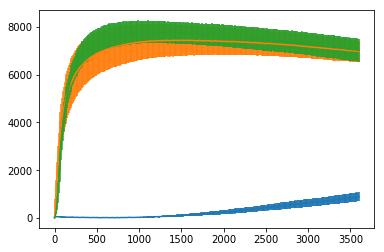

In [81]:
figObj, axObj = subplots()
axObj.errorbar(timeArr, mean(rfuMat[:, 0:2], 1), yerr = std(rfuMat[:, 0:2], 1))
axObj.errorbar(timeArr, mean(rfuMat[:, 3:5], 1), yerr = std(rfuMat[:, 3:5], 1))
axObj.errorbar(timeArr, mean(rfuMat[:, 6:8], 1), yerr = std(rfuMat[:, 6:8], 1))